### Imports and Settings

In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import mne
import pickle
import gc
import seaborn as sns

%matplotlib inline


### Load data

In [2]:
# Specify paths
data_path = '/Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/'
data_fname = 'HE228_03_ts.h5'
montage_fname = 'HE228_02_montage.pkl'

# Load montage
with open(data_path+montage_fname, 'rb') as f:
    montage = pickle.load(f)

# Load h5 file
f = h5py.File(data_path+data_fname, 'r')
eeg = f['eeg']
stim = f['stim']
print(list(f.keys()))

# Create info object from h5 attributes and index away empty channel 'VREF'
info = mne.create_info(eeg.attrs['ch_labels'].tolist()[0:256], eeg.attrs['sampling_rate'], ch_types='eeg')
raw = mne.io.RawArray(eeg[0:256,:], info)
raw.set_montage(montage)

# Save results 
raw.save(data_path+data_fname.split('.')[0]+'.fif',overwrite=True)
f.close()

['eeg', 'stim']
Creating RawArray with float64 data, n_channels=256, n_times=8924827
    Range : 0 ... 8924826 =      0.000 ...  8924.826 secs
Ready.


/var/folders/q8/v05ct80136s_vt_x7bq2dq780000gn/T/ipykernel_12250/2876990340.py:22: RuntimeWarning: This filename (/Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(data_path+data_fname.split('.')[0]+'.fif',overwrite=True)


Overwriting existing file.
Writing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts.fif
Overwriting existing file.
Writing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts-1.fif
Overwriting existing file.
Writing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts-2.fif
Overwriting existing file.
Writing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts-3.fif
Overwriting existing file.
Writing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts-4.fif
Closing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts-4.fif
Closing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts-3.fif
Closing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts-2.fif
Closing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts-1.fif
Closing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts.fif
[done]


#### Plot EOG epochs pre-cleaning

Using EOG channels: E32, E241, E25, E238
EOG channel index for this subject is: [ 24  31 237 240]


/var/folders/q8/v05ct80136s_vt_x7bq2dq780000gn/T/ipykernel_12250/3985942343.py:1: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2), ch_name=['E32','E241','E25','E238'])


Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 2 significant peaks
Number of EOG events detected: 2
Not setting metadata
2 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2 events and 1001 original time points ...
0 bad epochs dropped
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
combining channels using "me

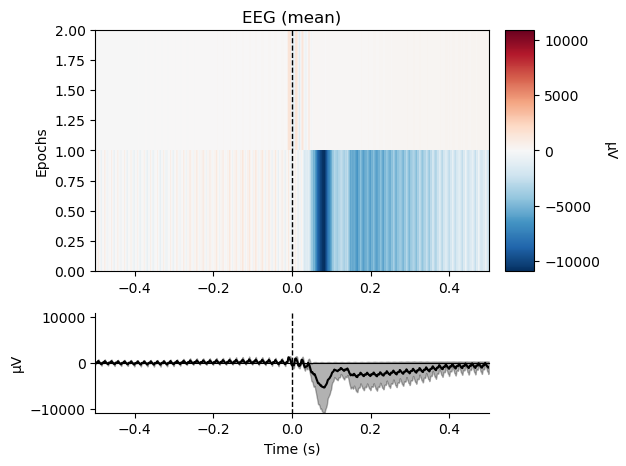

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


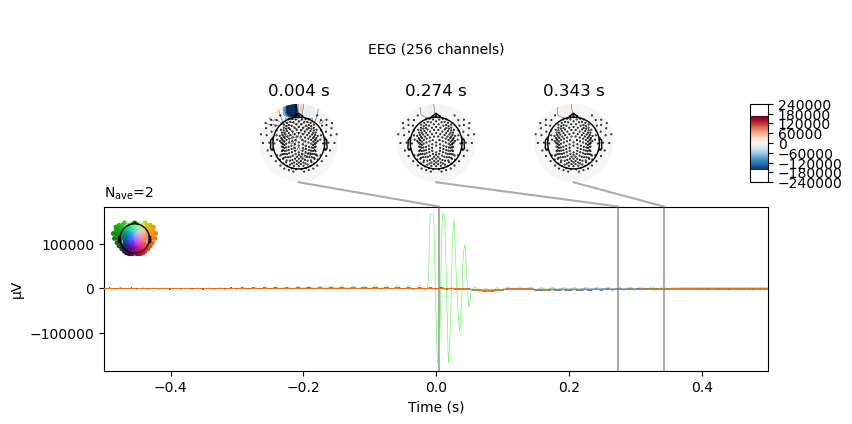

38276

In [3]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2), ch_name=['E32','E241','E25','E238'])
eog_epochs.plot_image(combine="mean")
eog_epochs.average().plot_joint()
del eog_epochs; gc.collect()

#### Notch filter for 60Hz and high-pass filter for drift

Effective window size : 2.048 (s)


/var/folders/q8/v05ct80136s_vt_x7bq2dq780000gn/T/ipykernel_12250/3617084495.py:16: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  fig = raw.compute_psd().plot(show=True, exclude='bads')
/Users/logang/mambaforge/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


Effective window size : 2.048 (s)


/var/folders/q8/v05ct80136s_vt_x7bq2dq780000gn/T/ipykernel_12250/3617084495.py:19: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  fig = treatment_filt.compute_psd().plot(show=True, exclude='bads')
/Users/logang/mambaforge/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


0

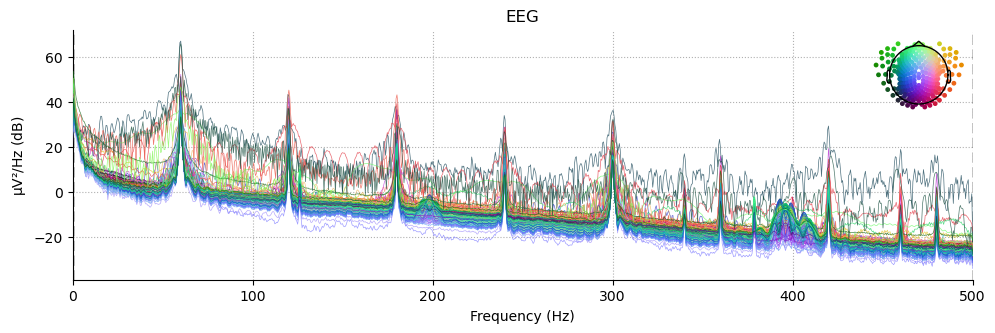

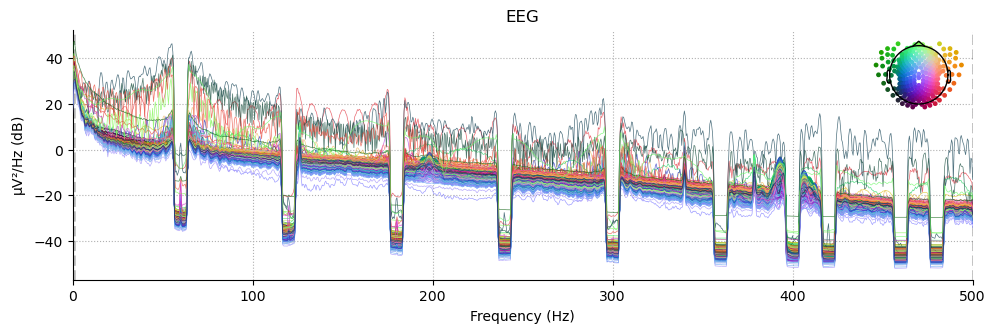

In [4]:
def notch_and_hp(raw, notch_freqs, notch_widths, l_freq=1.0, h_freq=None, filter_type='fir'):
    notch_freqs = np.array(notch_freqs)
    notch_widths = np.asarray(notch_widths)
    raw_notch = raw.copy().notch_filter(freqs=notch_freqs, notch_widths=notch_widths, verbose='warning')
    raw_hp = raw_notch.filter(l_freq=l_freq, h_freq=h_freq, method=filter_type, verbose='warning')
    return raw_hp

# Set notch filter at 60Hz and harmonics
notch_freqs = [60,120,180,240,300,360,400,420,460,480]
notch_widths = [8.0] # This is set pretty wide as there is very significant 60Hz noise in this data

# Notch filter and high pass at 1.0Hz
treatment_filt = notch_and_hp(raw, l_freq=1.0, notch_freqs=notch_freqs, notch_widths=notch_widths)

# Plot resulting PSDs for raw and filtered data
fig = raw.compute_psd().plot(show=True, exclude='bads')
sns.despine()

fig = treatment_filt.compute_psd().plot(show=True, exclude='bads')
sns.despine()

del raw; del fig; gc.collect()


#### Downsample and Remove Noisy Channels

Downsample to 'resample_freq'.

In [5]:
resample_freq = 200
treatment_filt.resample(resample_freq)
treatment_filt.save(data_path+data_fname.split('.')[0]+'_resampled'+'.fif',overwrite=True)

gc.collect()


Overwriting existing file.
Writing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts_resampled.fif


/var/folders/q8/v05ct80136s_vt_x7bq2dq780000gn/T/ipykernel_12250/1771367708.py:3: RuntimeWarning: This filename (/Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts_resampled.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  treatment_filt.save(data_path+data_fname.split('.')[0]+'_resampled'+'.fif',overwrite=True)


Closing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts_resampled.fif
[done]


44958

Use NoisyChannels to find and remove bad channels.

In [6]:
from pyprep.find_noisy_channels import NoisyChannels

nc = NoisyChannels(treatment_filt, random_state=42)
nc.find_all_bads(channel_wise=False)
bad_channels = nc.bad_by_deviation + nc.bad_by_hf_noise + nc.bad_by_dropout + nc.bad_by_ransac + nc.bad_by_correlation

# Print bad channel info
print('  Removed '+str(len(bad_channels))+' total:')
print('  --> Removed '+str(len(nc.bad_by_deviation))+' channels found to be bad by deviation.')
print('  --> Removed '+str(len(nc.bad_by_hf_noise))+' channels found to be bad by high frequency noise.')
print('  --> Removed '+str(len(nc.bad_by_correlation))+' channels found to be bad by correlations.')
print('  --> Removed '+str(len(nc.bad_by_dropout))+' channels found to be bad by dropout.')
print('  --> Removed '+str(len(nc.bad_by_ransac))+' channels found to be bad by RANSAC.')

# Interpolate bad channels
treatment_filt.info['bads'].extend(bad_channels)
treatment_filt.interpolate_bads(reset_bads=True) # This will clear out data.info['bads']
print("Data shape post interpolation:", treatment_filt._data.shape)

# Save out fif of data with bad channel correction
treatment_filt.save(data_path+data_fname.split('.')[0]+'_noisychannels'+'.fif',overwrite=True)

# takes about 35 min to get to this point 


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    4.0s


Executing RANSAC
This may take a while, so be patient...
Progress: 10%... 20%... 30%... 40%... 50%... 60%... 70%... 80%... 90%... 100%

RANSAC done!
  Removed 5 total:
  --> Removed 0 channels found to be bad by deviation.
  --> Removed 0 channels found to be bad by high frequency noise.
  --> Removed 3 channels found to be bad by correlations.
  --> Removed 0 channels found to be bad by dropout.
  --> Removed 2 channels found to be bad by RANSAC.
Interpolating bad channels
    Automatic origin fit: head of radius 96.5 mm
Computing interpolation matrix from 251 sensor positions
Interpolating 5 sensors
Data shape post interpolation: (256, 1784965)
Overwriting existing file.
Writing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts_noisychannels.fif


/var/folders/q8/v05ct80136s_vt_x7bq2dq780000gn/T/ipykernel_12250/4237008774.py:21: RuntimeWarning: This filename (/Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts_noisychannels.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  treatment_filt.save(data_path+data_fname.split('.')[0]+'_noisychannels'+'.fif',overwrite=True)


Closing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts_noisychannels.fif
[done]


#### Reject bad segments

Use autoreject library to reject bad segments. Note this may take some time/memory with longer data sets.

In [7]:
from autoreject import AutoReject, Ransac

def autoreject_bad_segments(raw, segment_length=1.0, method='autoreject'):
    # generate epochs object from raw
    epochs = mne.make_fixed_length_epochs(raw, duration=segment_length, preload=True)

    # Use mne-compatible autoreject library to clean epoched data
    n_interpolates = np.array([1, 4, 32])
    consensus_percs = np.linspace(0, 1.0, 11)

    if method=='autoreject':
        ar = AutoReject(n_interpolates, consensus_percs, thresh_method='bayesian_optimization', random_state=42)
    elif method=='ransac':
        ar = Ransac()
    else:
        raise pipeline_log.ValueError("Specified bad segment method not implemented. Current options are 'autoreject' and 'ransac'.")
    epochs = ar.fit_transform(epochs)
    return epochs, ar

epochs, ar = autoreject_bad_segments(treatment_filt, method='autoreject')

# 820

Not setting metadata
8924 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8924 events and 200 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/256 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/256 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/8924 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/8924 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/8924 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/8924 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/8924 [00:00<?,       ?it/s]

Dropped 5821 epochs: 0, 1, 3, 4, 5, 6, 7, 8, 12, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 29, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 53, 54, 59, 60, 61, 63, 67, 68, 69, 71, 72, 73, 74, 75, 78, 80, 81, 82, 83, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 115, 116, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 135, 136, 137, 138, 139, 142, 143, 144, 149, 151, 157, 159, 160, 161, 163, 168, 171, 174, 179, 180, 182, 186, 192, 195, 199, 200, 203, 204, 205, 206, 208, 209, 210, 214, 215, 217, 219, 220, 221, 222, 223, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 270, 271, 272, 273, 275, 276, 277, 278, 280, 281, 282, 283, 284, 286, 288, 289, 290, 292, 293, 294, 295, 296, 297, 298, 300, 301, 302, 303, 304, 305, 307, 308, 309, 310, 311, 312, 313, 314

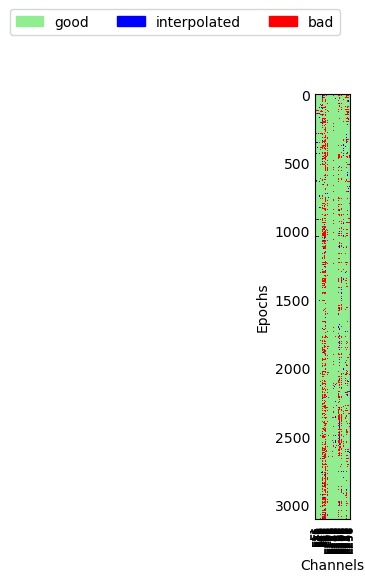

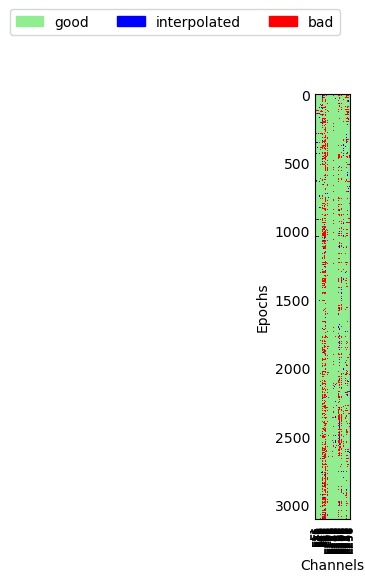

In [8]:
# Generate rejected segment plot
ar.get_reject_log(epochs).plot(show=True)
    


In [9]:
epochs.save(data_path+data_fname.split('.')[0]+'_autoreject_epochs'+'.fif',overwrite=True)
treatment_filt_info = treatment_filt.info
del treatment_filt; gc.collect()


Overwriting existing file.


/var/folders/q8/v05ct80136s_vt_x7bq2dq780000gn/T/ipykernel_12250/51236219.py:1: RuntimeWarning: This filename (/Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts_autoreject_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(data_path+data_fname.split('.')[0]+'_autoreject_epochs'+'.fif',overwrite=True)


47

In [10]:
# Construct new RAW object from epoched data output by autoreject
X = np.concatenate(epochs.get_data(), axis=1) # new numpy array of appended epochs
del epochs; gc.collect()
treatment_autoreject = mne.io.RawArray(X, treatment_filt_info)
del X; gc.collect()
treatment_autoreject.set_montage(montage)
treatment_autoreject.save(data_path+data_fname.split('.')[0]+'_autoreject_raw'+'.fif',overwrite=True)



Creating RawArray with float64 data, n_channels=256, n_times=620600
    Range : 0 ... 620599 =      0.000 ...  3102.995 secs
Ready.
Overwriting existing file.
Writing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts_autoreject_raw.fif
Closing /Users/logang/Dropbox/GrosenickLab/data/Isaac_EEG/HE228_03_ts_autoreject_raw.fif
[done]


#### Replot EOG epochs after bad channel and segment rejection

Using EOG channels: E32, E241, E25, E238
EOG channel index for this subject is: [ 24  31 237 240]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 2 significant peaks
Number of EOG events detected: 2
Not setting metadata
2 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2 events and 201 original time points ...
0 bad epochs dropped
Not setting metadata
2 matching event

/var/folders/q8/v05ct80136s_vt_x7bq2dq780000gn/T/ipykernel_12250/2680552442.py:1: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  eog_epochs = mne.preprocessing.create_eog_epochs(treatment_autoreject, baseline=(-0.5, -0.2), ch_name=['E32','E241','E25','E238'])


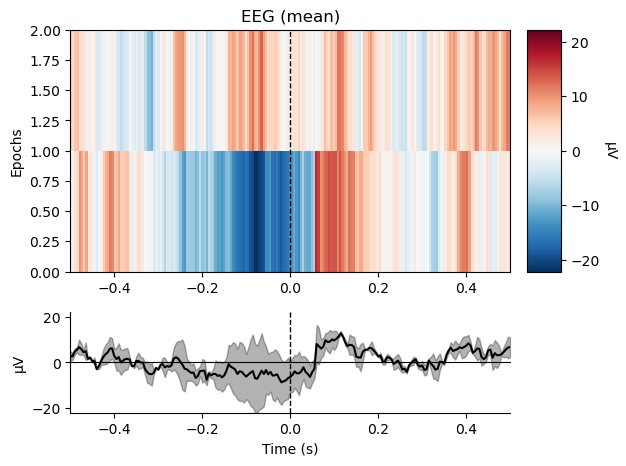

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


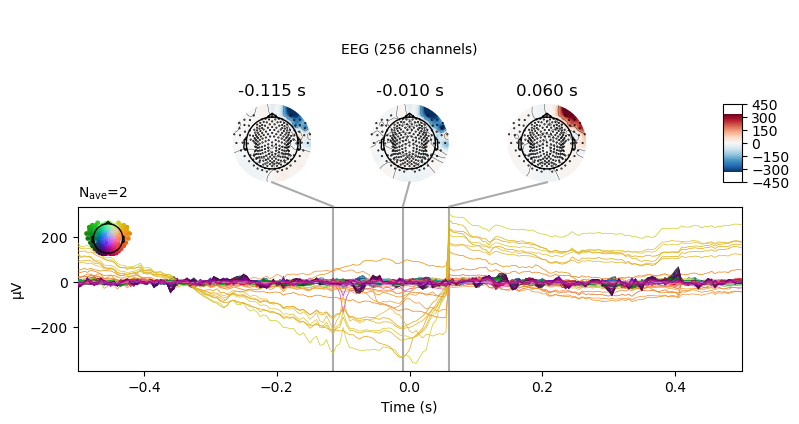

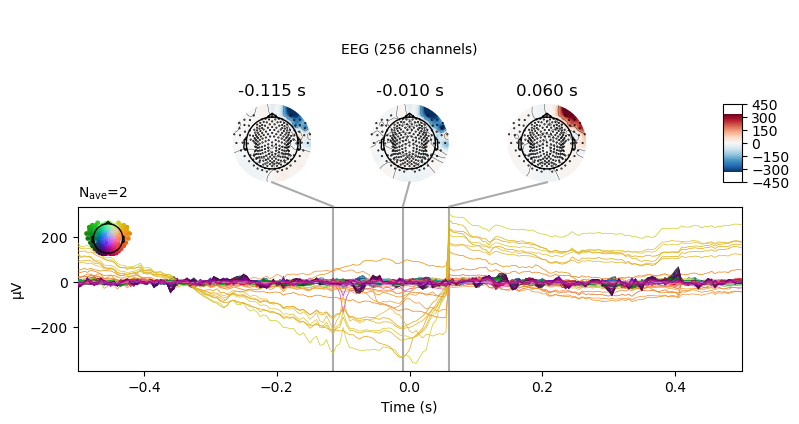

In [11]:
eog_epochs = mne.preprocessing.create_eog_epochs(treatment_autoreject, baseline=(-0.5, -0.2), ch_name=['E32','E241','E25','E238'])
eog_epochs.plot_image(combine="mean")
eog_epochs.average().plot_joint()

For reloading saved clean data if jupyter notebook barfs

In [12]:
#treatment_autoreject = mne.io.Raw(data_path+data_fname.split('.')[0]+'_autoreject_raw'+'.fif', preload=True )


Run ICA on cleaned data

In [13]:
import os
import mne
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs
treatment_autoreject = treatment_autoreject.copy().filter(l_freq=1.0, h_freq=None)

ica = ICA(n_components=200, max_iter="auto", random_state=97)
ica.fit(treatment_autoreject)

explained_var_ratio = ica.get_explained_variance_ratio(treatment_autoreject)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.1s


Fitting ICA to data using 256 channels (please be patient, this may take a while)
Selecting by number: 200 components
Fitting ICA took 147.4s.
Fraction of eeg variance explained by all components: 0.9925741806737702


Plot ICA spatial sources

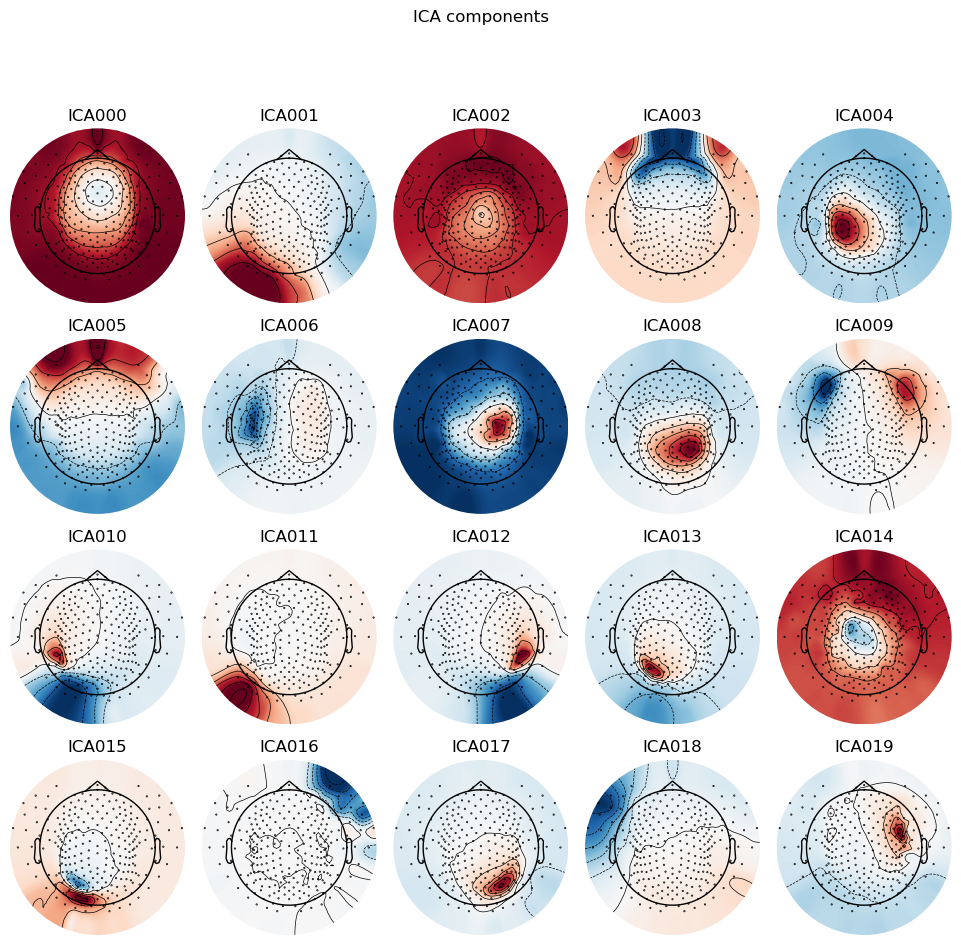

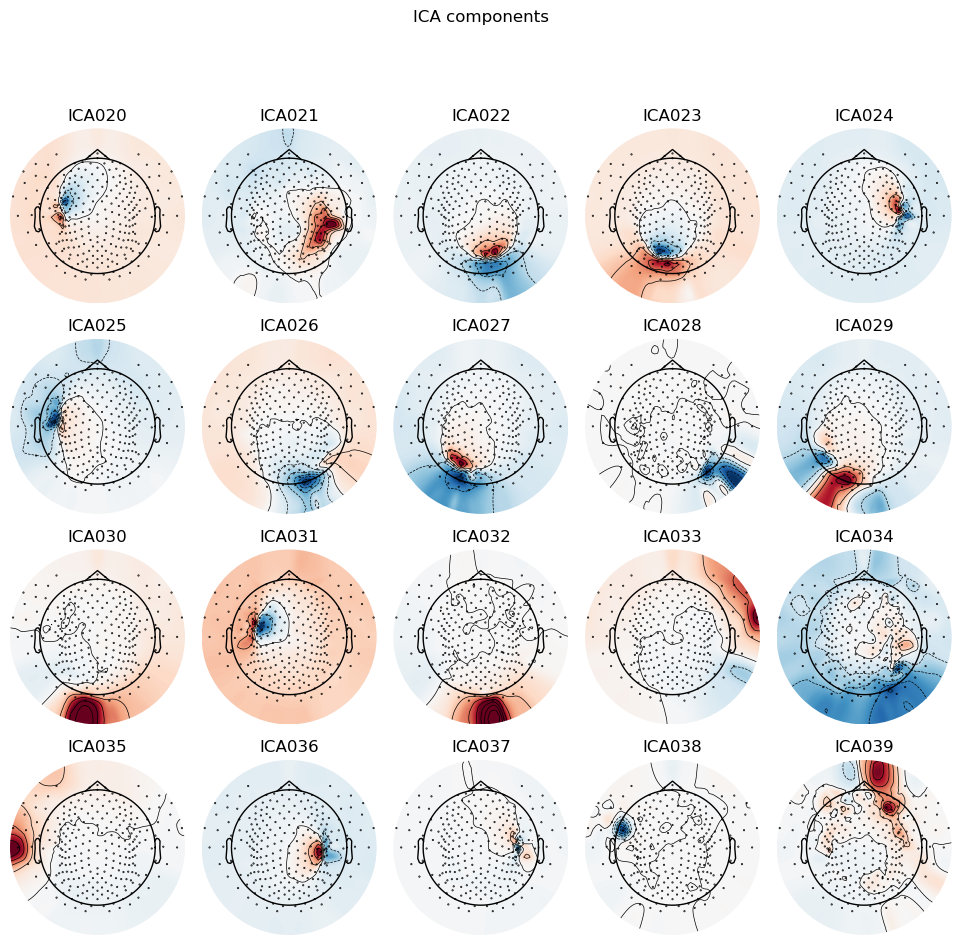

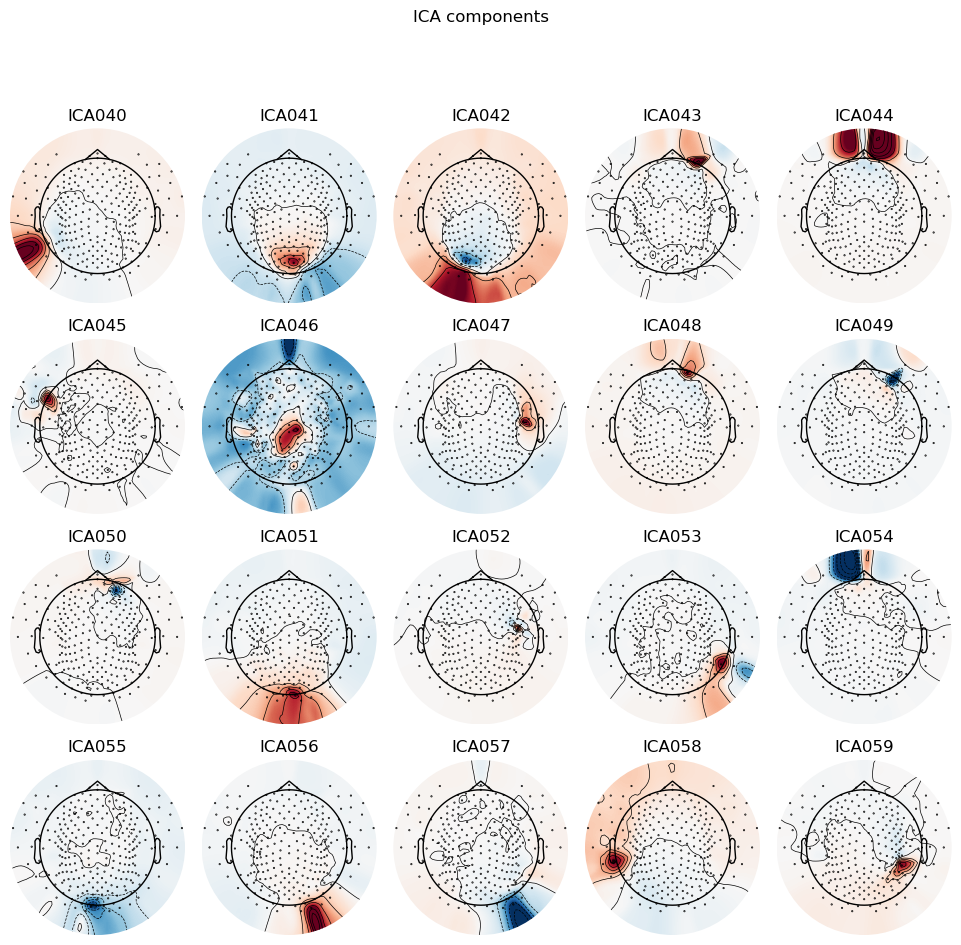

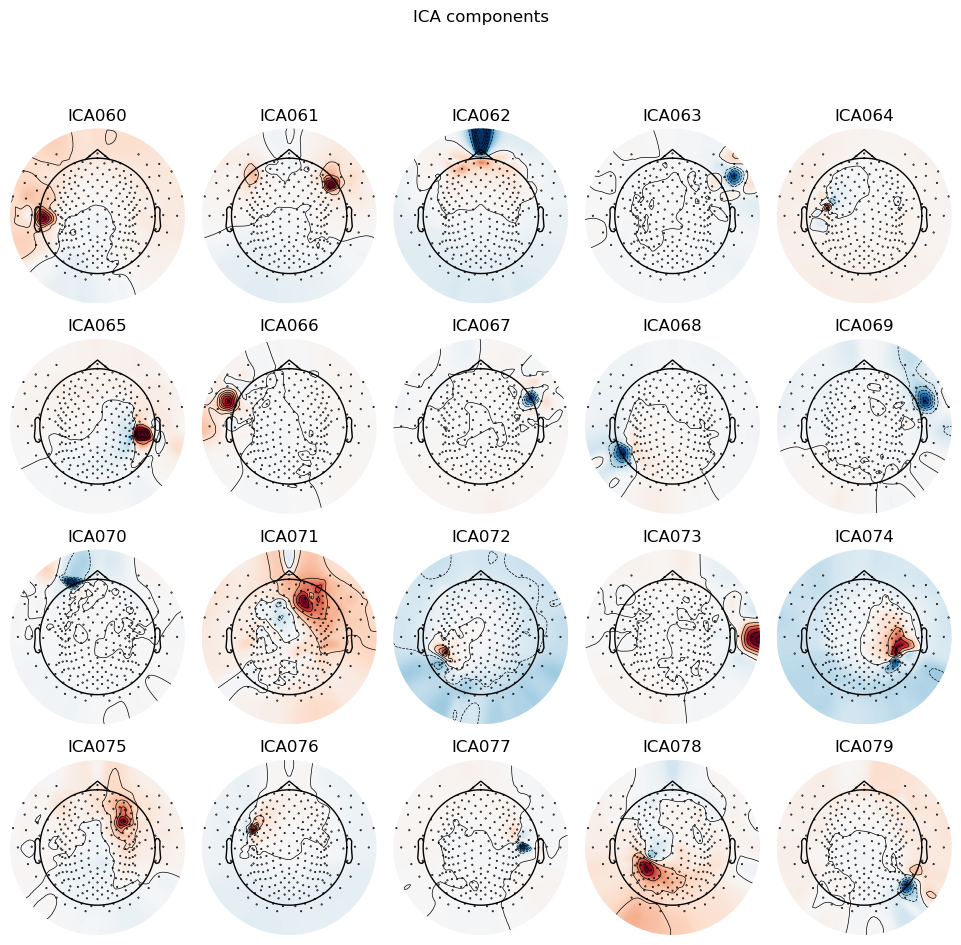

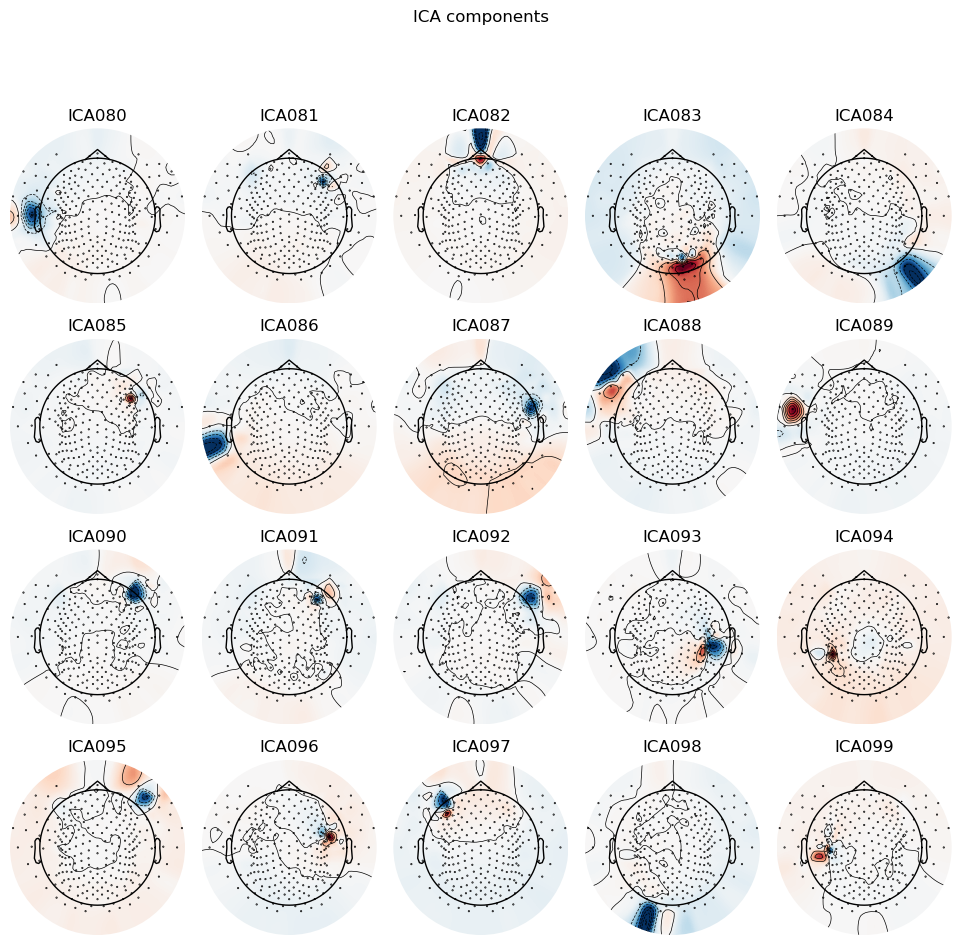

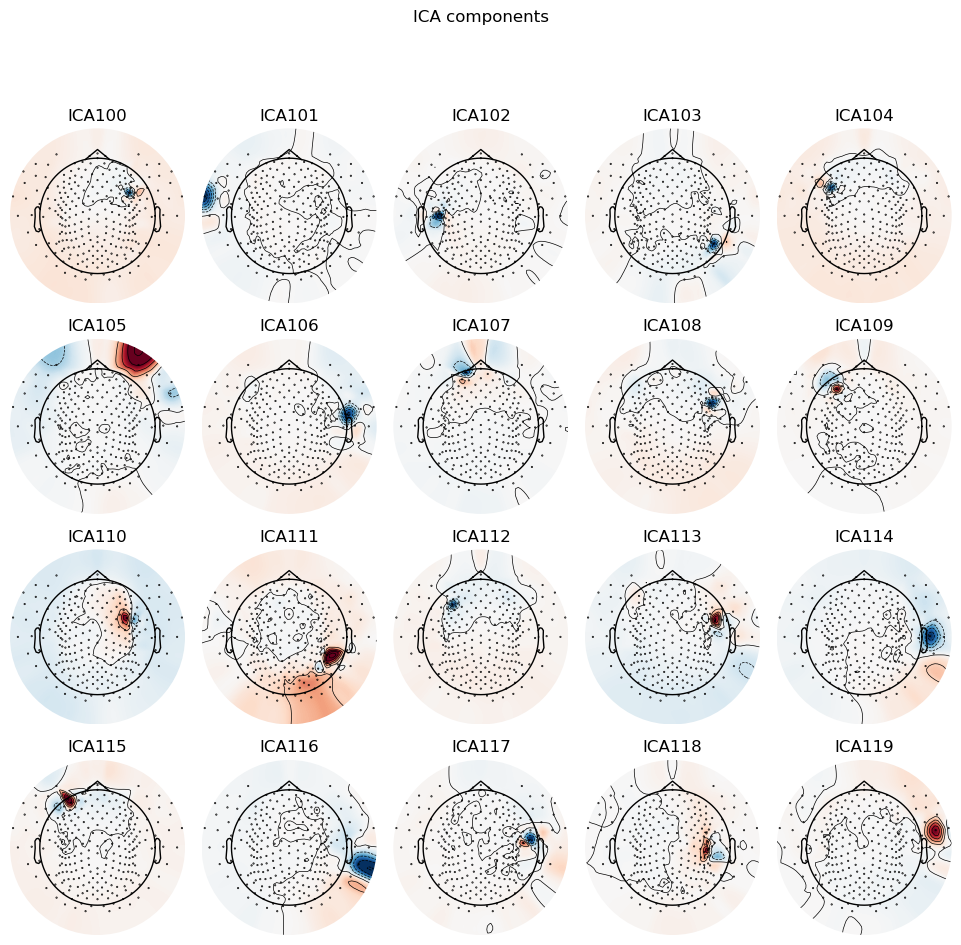

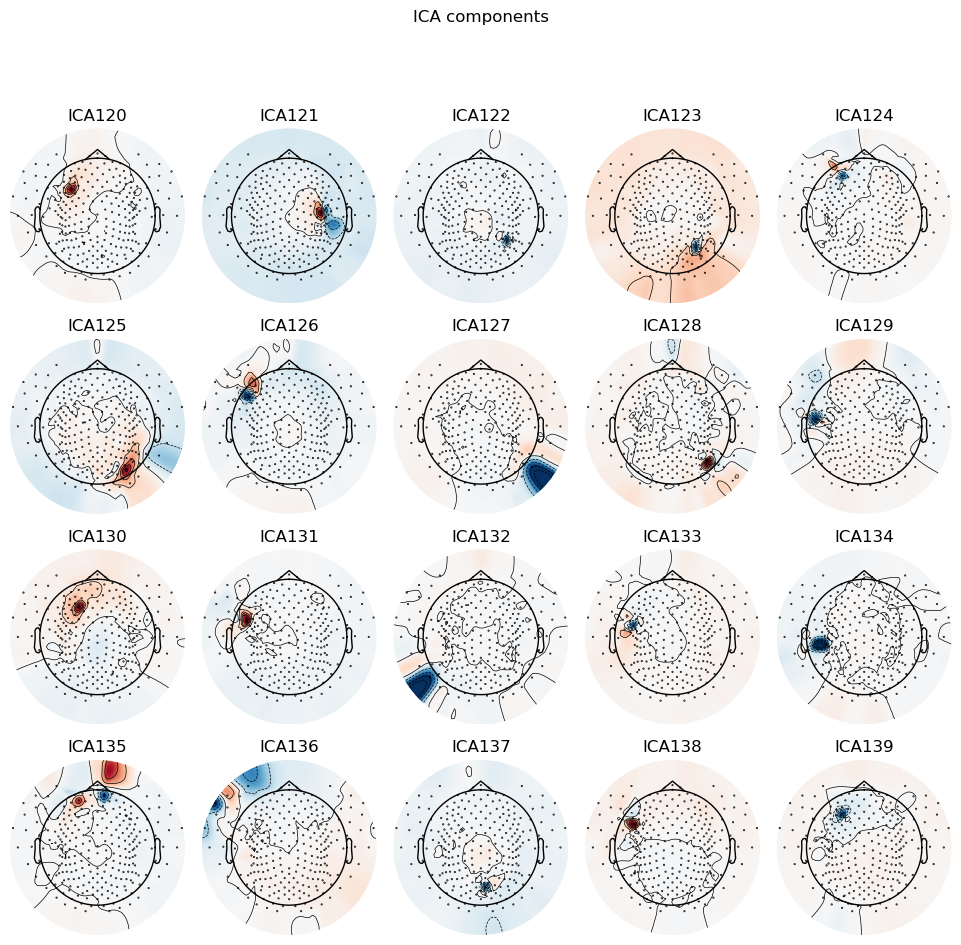

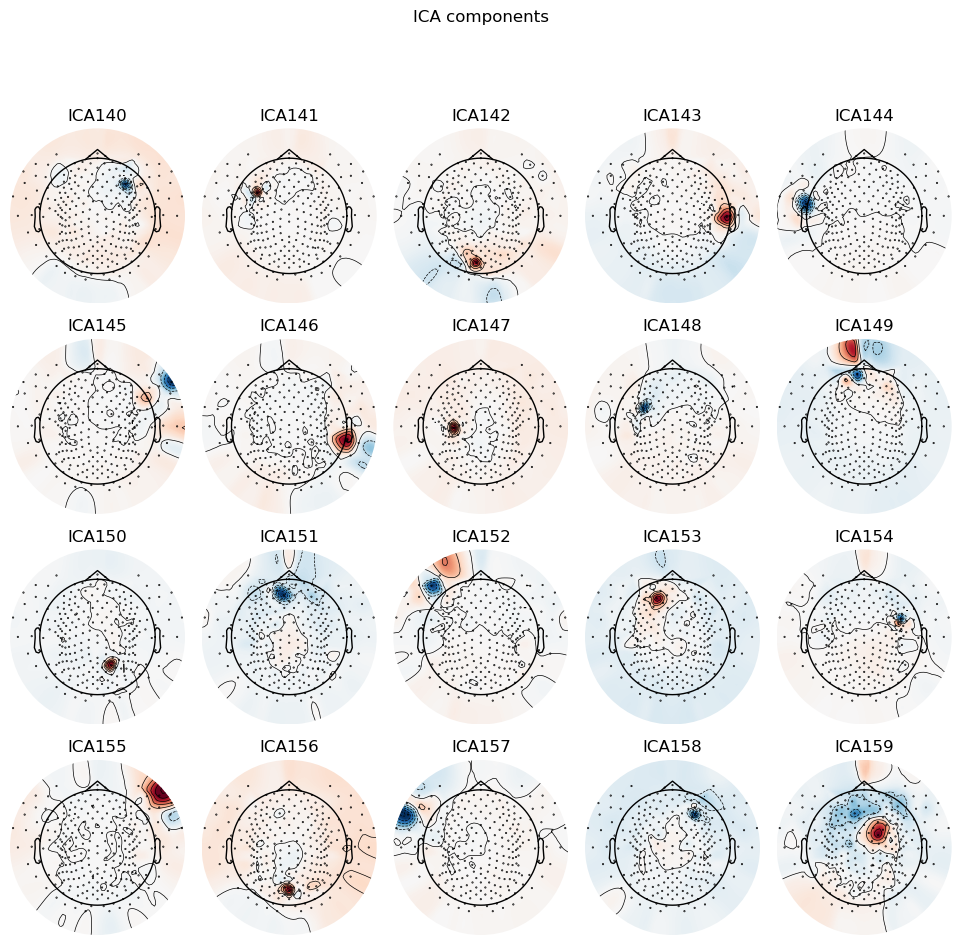

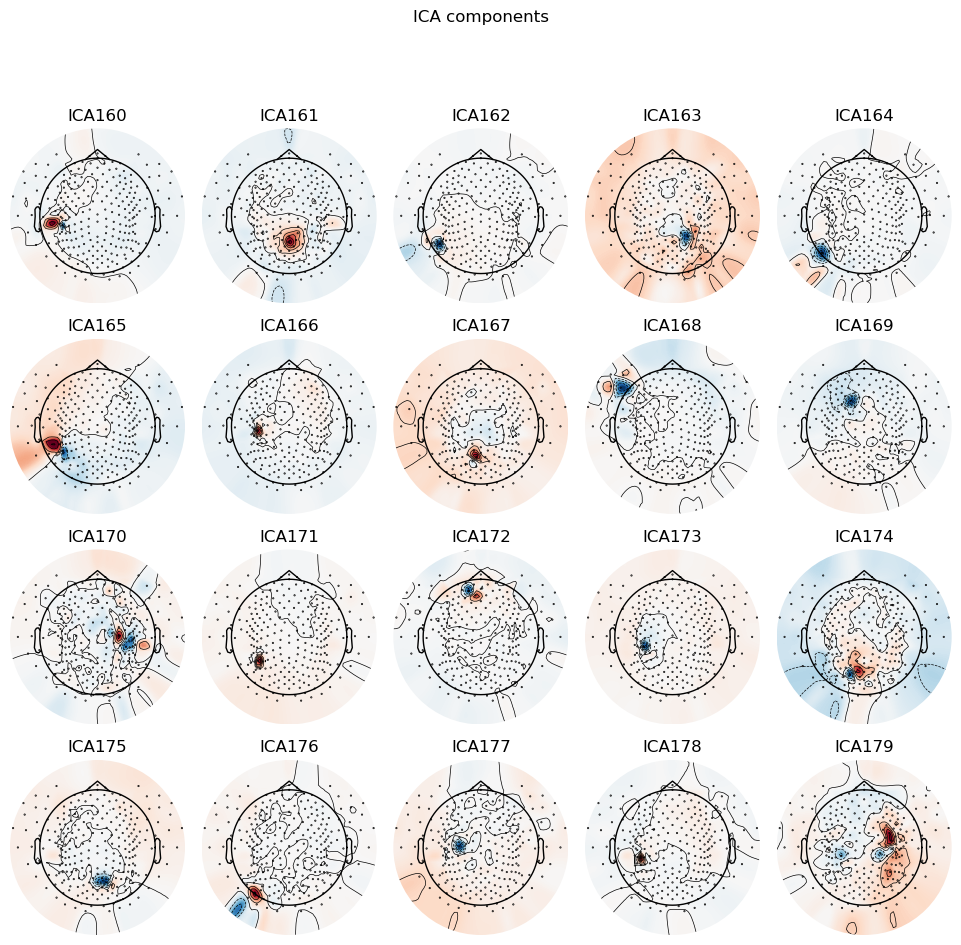

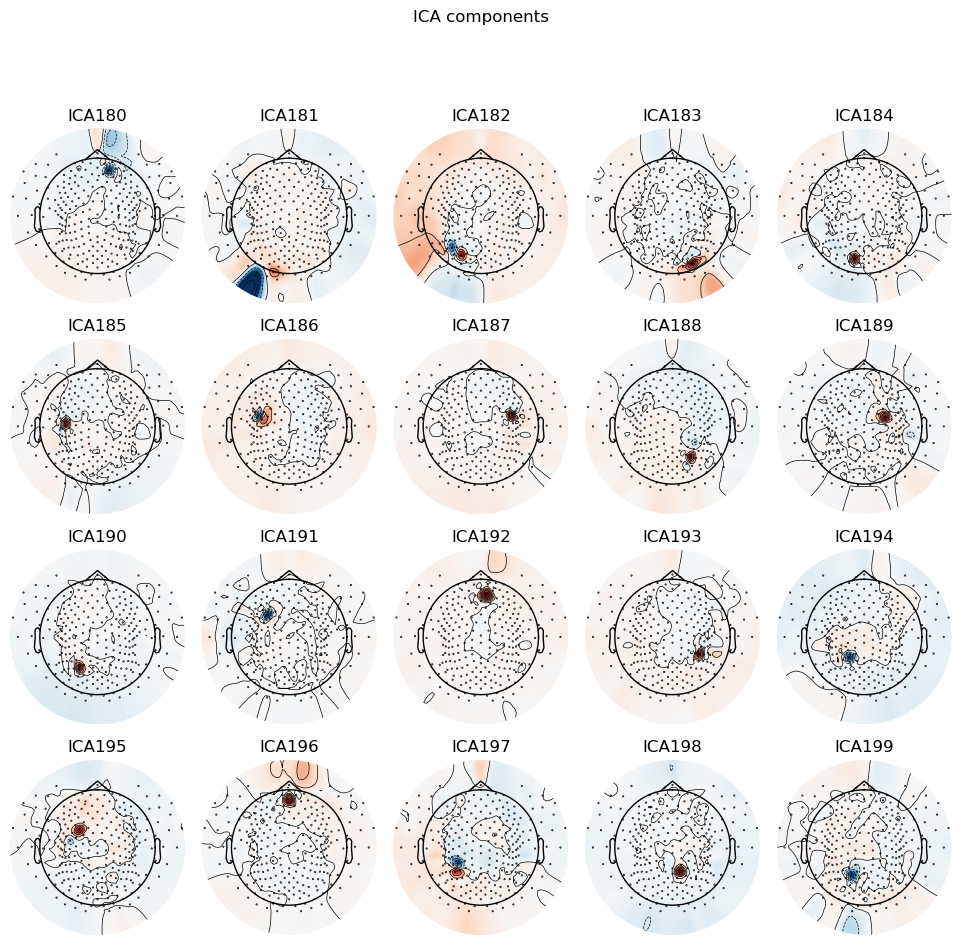

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>]

In [14]:
ica.plot_components()


Plot ICA source traces

In [13]:
ica.plot_sources(treatment_autoreject, show_scrollbars=False)


Creating RawArray with float64 data, n_channels=200, n_times=620600
    Range : 0 ... 620599 =      0.000 ...  3102.995 secs
Ready.
Using qt as 2D backend.
Using pyopengl with version 3.1.6


Plot cleaned data traces

In [15]:
treatment_autoreject.plot()

Using pyopengl with version 3.1.6


Channels marked as bad:
none


In [ ]:
# Remove bad channels, reconstruct and run through autoreject again?

In [20]:
from mne_icalabel import label_components

# Filter data to icalabel requirements
mne_filt = treatment_autoreject.filter(l_freq=1.0, h_freq=99.0, verbose='warning')

# Use label_components function from ICLabel library to classify ICs and get their estimated probabilities
print('  Using ICALabel to classify independent components.')
ic_labels = label_components(mne_filt, ica, method="iclabel")
labels = ic_labels["labels"]
    
# Exclude ICs not in 'keep' list and reconstruct cleaned raw data
keep=['brain']
exclude_idx = [idx for idx, label in enumerate(labels) if label not in keep]
print(f"  Excluding these ICA components: {exclude_idx}")
cleaned = ica.apply(treatment_autoreject, exclude=exclude_idx, verbose=False)



  Using ICALabel to classify independent components.


/var/folders/q8/v05ct80136s_vt_x7bq2dq780000gn/T/ipykernel_11260/4265003735.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(mne_filt, ica, method="iclabel")
/var/folders/q8/v05ct80136s_vt_x7bq2dq780000gn/T/ipykernel_11260/4265003735.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(mne_filt, ica, method="iclabel")
/var/folders/q8/v05ct80136s_vt_x7bq2dq780000gn/T/ipykernel_11260/4265003735.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
  Excluding these ICA components: [0, 1, 3, 5, 9, 10, 11, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
